<a href="https://colab.research.google.com/github/pushna99/cs480student/blob/main/01/Copy_of_Copy_of_Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

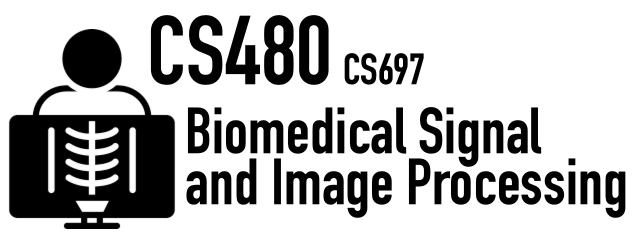
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 2.5MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [4]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [5]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [6]:
# TODO: There are 3 slices - Axial, Sagittal and Coronal

In [7]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [8]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

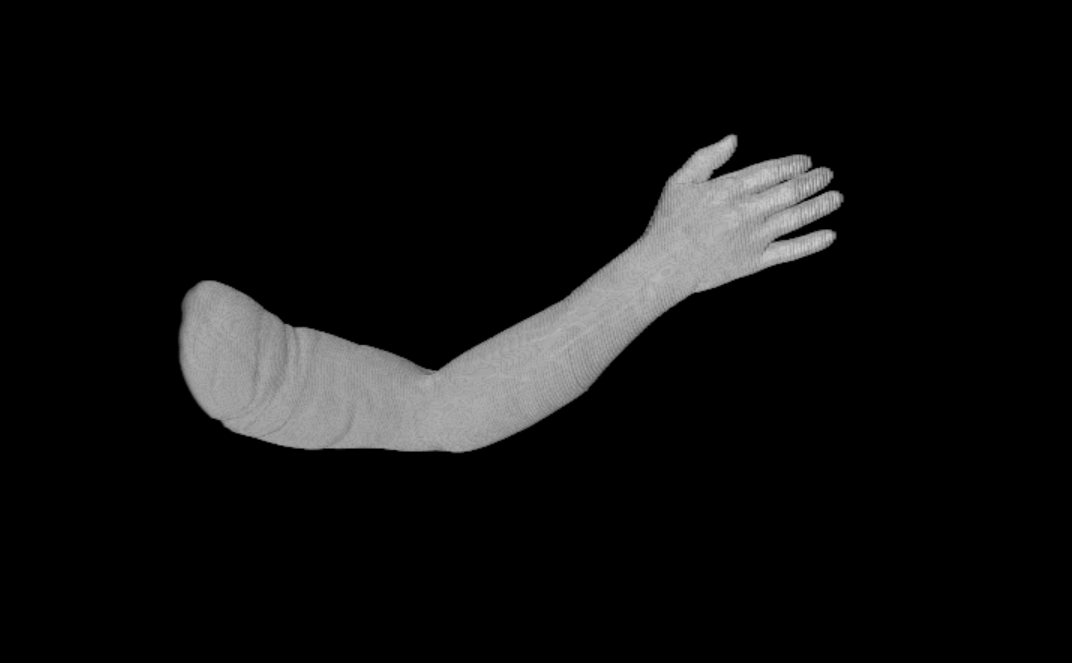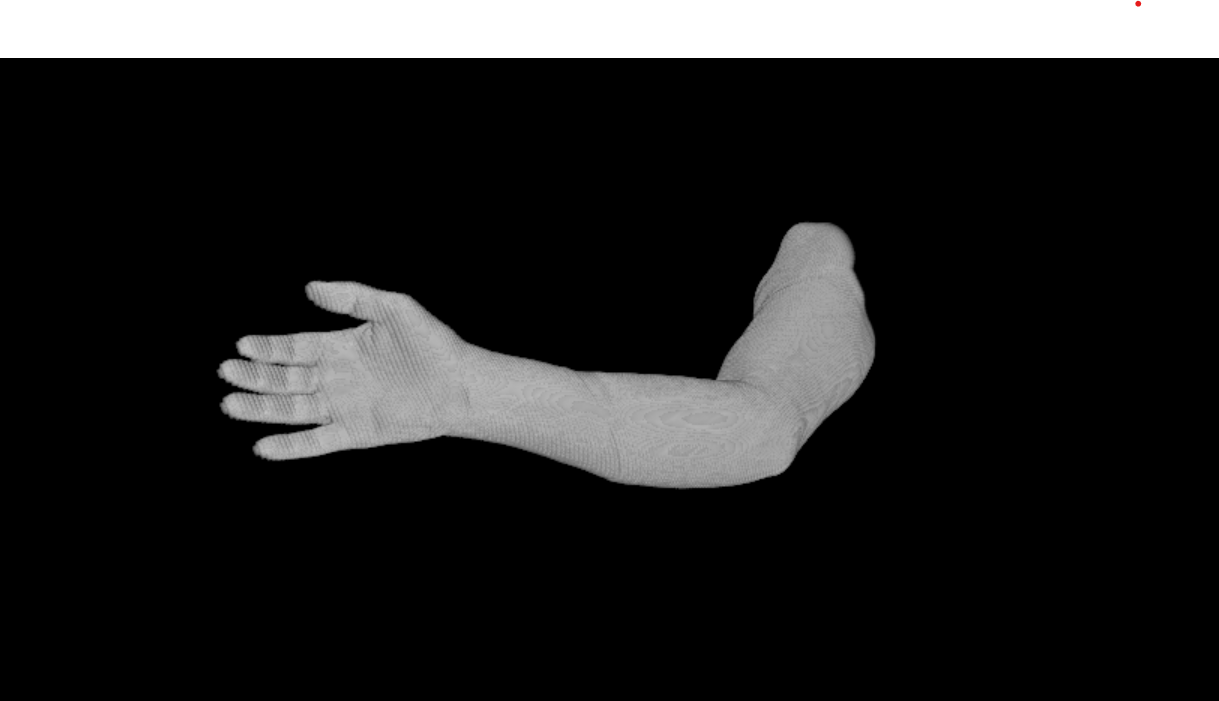

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [9]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [10]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [12]:
from pydicom import dcmread
!pip install dicom
import os
import numpy
!pip install dicom_numpy
import dicom
import sys
import glob

     |████████████████████████████████| 768kB 3.0MB/s 
  Created wheel for dicom-numpy: filename=dicom_numpy-0.5.0-py2.py3-none-any.whl size=6454 sha256=573db31df05afb29e0c2badf0ea4b664308f8b56e4777ebe2f0f36d9dc2f5573
  Stored in directory: /root/.cache/pip/wheels/58/83/be/0beac28a5893128dbfb33419b024e5c7bd9ca62c8fdf8dd630
Successfully built dicom-numpy


/usr/local/lib/python3.7/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [13]:
PathDicom = "/content/ct/"
lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesDCM.append(os.path.join(dirName,filename))

In [14]:
RefDs = dcmread(lstFilesDCM[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
sampl1=[]

In [15]:
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
for filenameDCM in lstFilesDCM:
    ds = dcmread(filenameDCM)
    sampl1.append(ds)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    

In [16]:
sampl1

[Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189444.4964
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189444.4964
(0008, 0020) Study Date                     

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.
import numpy as np
import matplotlib.pyplot as plt

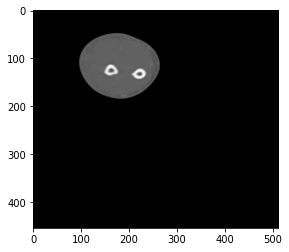

In [17]:
# TODO: YOUR CODE FOR AXIAL
imshow(ArrayDicom[:, :, 32],cmap='gray')

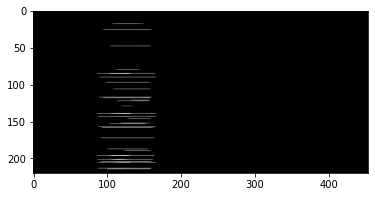

In [18]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(squeeze(ArrayDicom[:,32,:]).T,cmap='gray')

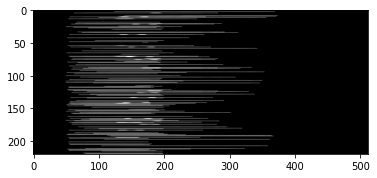

In [19]:
# TODO: YOUR CODE FOR CORONAL
imshow(squeeze(ArrayDicom[192, :, :].T),cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [20]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [21]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [22]:
# TODO: 
sl1=sampl1[1]

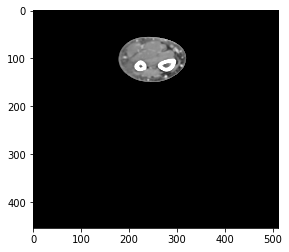

In [23]:
hu_pixels=sl1.pixel_array*sl1.RescaleSlope
level=sl1.WindowCenter
window=sl1.WindowWidth
vmin = level - window/2
vmax = level + window/2
rescale=sl1.RescaleIntercept
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [24]:
print(vmin)
print(vmax)

-175.0
235.0


In [25]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

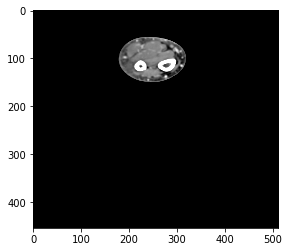

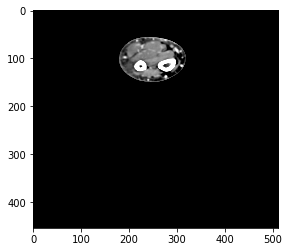

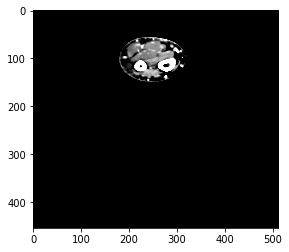

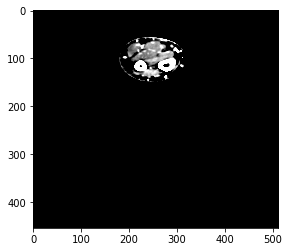

In [26]:
# TODO: YOUR CODE
vmin= -100
vmax= 200
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
vmin= -50
vmax = 150
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
vmin= 0
vmax=100
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
vmin=20
vmax=80
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [27]:
# Which values make sense and why?

In [28]:
# TODO: 

In [29]:
# the values which are very much to the extremes have a better window/level image quality than the images with much 
# nearer vmin, vmax values.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [30]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

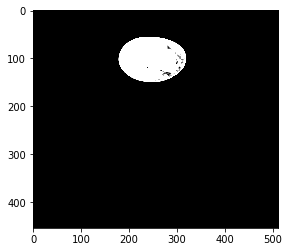

In [31]:
# TODO: YOUR CODE TO SEGMENT FAT
imagevolume= ArrayDicom[:, :, 32]
new_mask = imagevolume.copy()
plt.imshow(hu_pixels + rescale, cmap='gray',vmin=-100,vmax=-50)
plt.show()
#the HU units for Fat is -100 to -50

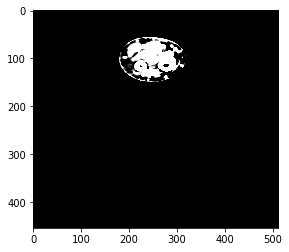

In [32]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
imagevolume= ArrayDicom[:, :, 32]
new_mask = imagevolume.copy()
plt.imshow(hu_pixels + rescale, cmap='gray',vmin=10,vmax=40)
plt.show()
#The HU units for tissues/muscle is 10 and 40

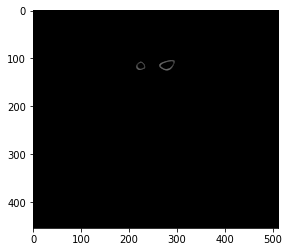

In [33]:
  # TODO: YOUR CODE TO SEGMENT BONES
imagevolume= ArrayDicom[:, :, 32]
new_mask = imagevolume.copy()
plt.imshow(hu_pixels + rescale, cmap='gray',vmin=700,vmax=3000)
plt.show()
# the HU units for Bones is 700 and 3000

In [34]:
# Are the segmentations good?

In [35]:
# TODO: YOUR ANSWER

In [36]:
#Yeah, the segmentations are pretty good given the HU units and limits of each segments.

In [37]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""